     Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
0     40    Male         0           1                   0         1   
1     58    Male         0           0                   0         1   
2     41    Male         1           0                   0         1   
3     45    Male         0           0                   1         1   
4     60    Male         1           1                   1         1   
..   ...     ...       ...         ...                 ...       ...   
515   39  Female         1           1                   1         0   
516   48  Female         1           1                   1         1   
517   58  Female         1           1                   1         1   
518   32  Female         0           0                   0         1   
519   42    Male         0           0                   0         0   

     Polyphagia  Genital thrush  visual blurring  Itching  Irritability  \
0             0               0                0        1   

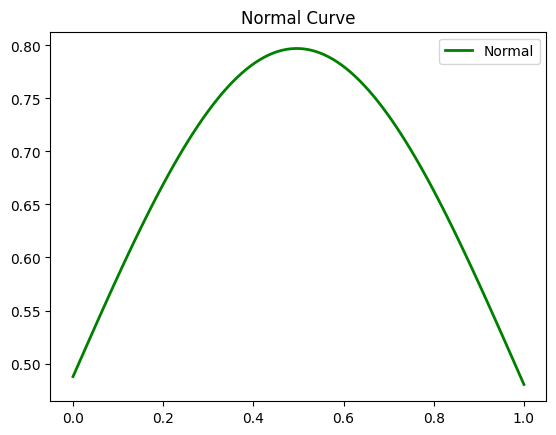

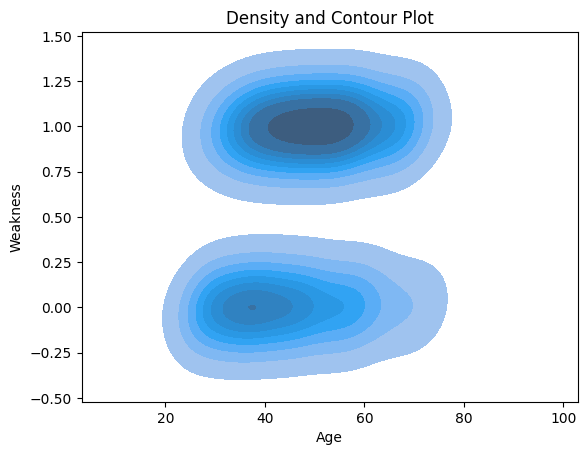

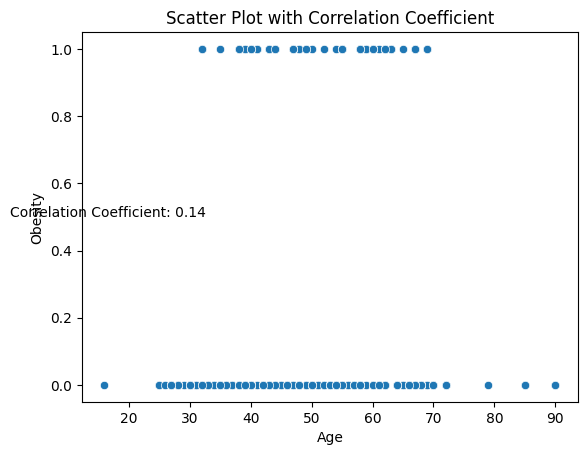

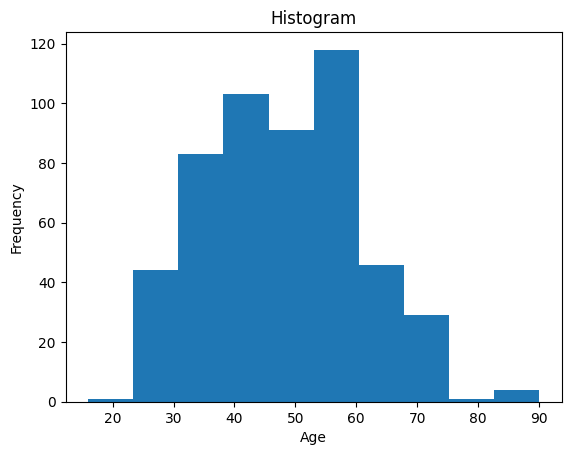

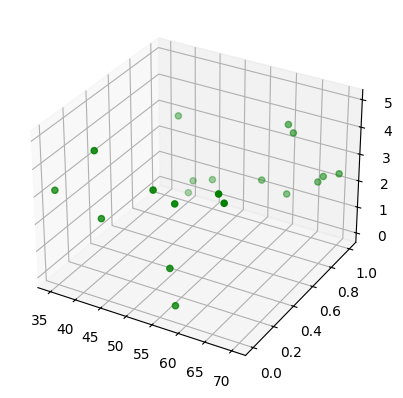

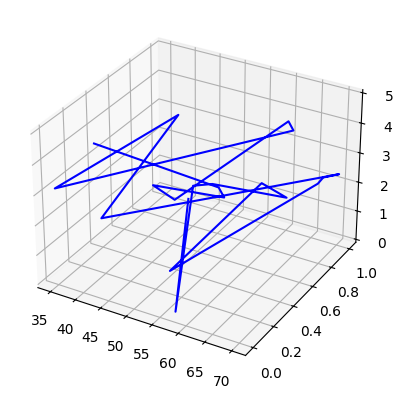

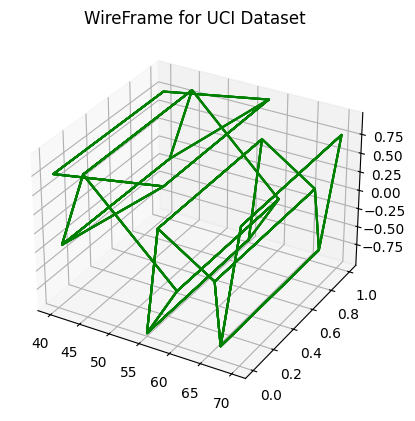

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import norm
import seaborn as sns

# Load data
df = pd.read_csv("diabetes_data_upload.csv")
print(df)

# Normal curve plot
data = df['Polyuria']
mean = data.mean()
std_dev = data.std()
random = np.random.normal(mean, std_dev, len(data))
x_min, x_max = plt.xlim()
x = np.linspace(x_min, x_max, 100)
p = norm.pdf(x, mean, std_dev)

plt.title("Normal Curve")
plt.plot(x, p, "g", linewidth=2, label="Normal")
plt.legend()
plt.show()

# Density and Contour plots
sns.kdeplot(data=df, x='Age', y='weakness', fill=True)
plt.title('Density and Contour Plot')
plt.xlabel('Age')
plt.ylabel('Weakness')
plt.show()

# Correlation and scatter plot
x = df['Age']
y = df['Obesity']
sns.scatterplot(x=x, y=y)
corr = np.corrcoef(x, y)[0, 1]
plt.title('Scatter Plot with Correlation Coefficient')
plt.xlabel('Age')
plt.ylabel('Obesity')
plt.text(0.5, 0.5, 'Correlation Coefficient: {:.2f}'.format(corr))
plt.show()

# Histogram plot
plt.hist(df['Age'], bins=10)
plt.title("Histogram")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# 3D Plot 1
fig = plt.figure()
ax = plt.axes(projection='3d')
zline = np.linspace(0, 5, 20)
xline = df['Age'].head(20)
yline = df['Itching'].head(20)
ax.scatter3D(xline, yline, zline, color='green')
plt.show()

# 3D Plot 2
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(xline, yline, zline, color='blue')
plt.show()

# 3D Plot 3 - Wireframe
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = df['Age'].head(10)
y = df['Obesity'].head(10)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='green')
ax.set_title('WireFrame for UCI Dataset')
plt.show()
